# Customer segmentation in online retail 

## Contributers
Kommalapati Jhansi Lakshmi - CB.EN.U4CSE18031

Nishita Dash - CB.EN.U4CSE18037

Hridhi Sethi - CB.EN.U4CSE18502

# Introduction

Various chain of hypermarkets generates large amount of data. This data needs to be analyzed for designing profitable strategies.

With the increase in customer base and transaction, it is not easy to understand the requirement of each customer. Identifying potential customers can improve the marketing campaign, which ultimately increases the sales.Segmentation can play a better role in grouping those customers into various segments.

We have segmented the customers using the RFM (Recency, Frequency, Monetary) and coherent analysis to find out the potential customer.

# Importing Libraries and data set

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

import squarify
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import datasets
data = pd.read_csv('C:/Users/Nishita/K-means-clustering-using-RFM-variables/data.csv', sep=",", encoding="ISO-8859-1", header=0)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


# Understanding the data and preprocessing

In [3]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
data.loc[(data.UnitPrice<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,12-08-2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,12-08-2011 14:52,-11062.06,NaN,United Kingdom


In [6]:
data.loc[(data.Quantity<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09-12-2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,09-12-2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09-12-2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09-12-2011 11:58,1.25,17315.0,United Kingdom


In [7]:
data.describe(include='O')

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,31-10-2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


In [8]:
data.isnull().mean()*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [9]:
data = data[data.Country == 'United Kingdom']

In [10]:
data = data[data.Quantity > 0]

In [11]:
data = data[data.UnitPrice > 0]

In [12]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [13]:
data = data[pd.notnull(data['CustomerID'])]

In [14]:
data.isnull().mean()

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [15]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
data.duplicated().sum()

5118

In [18]:
#removing duplicates
data.drop_duplicates(keep='first', inplace=True)
data.shape

(349203, 8)

In [19]:
#let's do a copy of our df for next manipulations
retail = data.copy()

In [20]:
#calculate revenue per row and add new column
retail['Revenue'] = retail['Quantity'] * retail['UnitPrice']

In [21]:
retail.InvoiceDate = pd.to_datetime(retail['InvoiceDate'], format='%d-%m-%Y %H:%M')

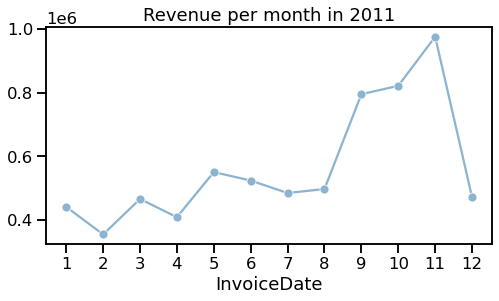

In [22]:
# Let's visualize the top grossing months
retail_month = retail[retail.InvoiceDate.dt.year==2011]
monthly_gross = retail_month.groupby(retail_month.InvoiceDate.dt.month).Revenue.sum()

plt.figure(figsize=(8,4))
sns.set_context("talk")
sns.set_palette("PuBuGn_d")
sns.lineplot(y=monthly_gross.values,x=monthly_gross.index, marker='o')
plt.xticks(range(1,13))
plt.title("Revenue per month in 2011")
plt.show()

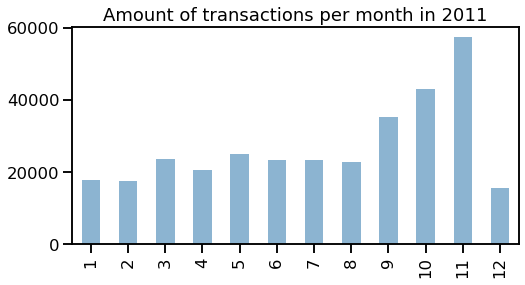

In [23]:
#amount of transactions per month
plt.figure(figsize=(8,4))
retail[retail.InvoiceDate.dt.year==2011].InvoiceDate.dt.month.value_counts(sort=False).plot(kind='bar')
plt.title("Amount of transactions per month in 2011")
plt.show()

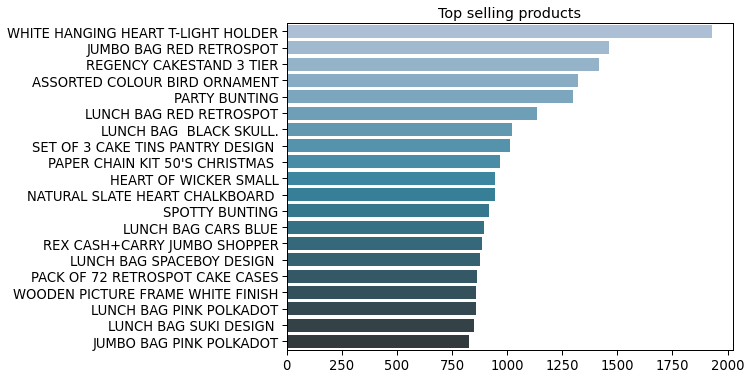

<Figure size 432x288 with 0 Axes>

In [24]:
# Let's visualize some top products from the whole range
top_products = retail['Description'].value_counts()[:20]
plt.figure(figsize=(8,6))
sns.set_context("paper", font_scale=1.5)
sns.barplot(y = top_products.index,
            x = top_products.values, 
           palette='PuBuGn_d')
plt.title("Top selling products")
plt.show()
plt.savefig('top_products.png')

# Cohort Analysis

Assign acquisition month cohort to each customer

In [25]:
#creating invoice month column to see first month when customer purchased 
retail['InvoiceMonth'] = retail['InvoiceDate'].apply(lambda x: dt.datetime(x.year, x.month, 1))

In [26]:
grouping = retail.groupby('CustomerID')['InvoiceMonth']
#assign smallest invoice value to each customer
retail['CohortMonth'] = grouping.transform('min')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01


In [27]:
#function to extract year, month, day as integers
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [28]:
#function to extract year, month, day as integers
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [29]:
#extract month
invoice_year, invoice_month, _ = get_date_int(retail, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(retail, 'CohortMonth')

In [30]:
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

In [31]:
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

In [32]:
# Extract the difference in days from all previous values
retail['CohortIndex'] = years_diff * 12 + months_diff + 1
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1


In [33]:
#count monthly active customers from each cohort
grouping = retail.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth', columns = 'CohortIndex', values='CustomerID')

In [34]:
#Customer retention
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention = retention.round(3) * 100
retention.head(20)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,35.5,32.3,37.3,36.0,39.6,35.7,34.1,35.5,39.9,36.7,49.7,26.7
2011-01-01,100.0,21.2,26.0,23.5,33.2,27.7,25.1,24.3,30.2,32.7,35.5,12.0,NaN
2011-02-01,100.0,18.8,19.4,28.5,28.8,25.3,25.6,28.2,26.5,30.6,7.4,NaN,NaN
2011-03-01,100.0,15.3,26.0,19.8,22.4,16.5,26.5,22.9,28.4,9.1,NaN,NaN,NaN
2011-04-01,100.0,20.9,20.2,21.7,20.2,22.0,22.0,26.4,7.2,NaN,NaN,NaN,NaN
2011-05-01,100.0,18.8,17.2,17.2,20.7,22.7,26.6,9.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.8,14.5,23.8,23.8,32.2,9.8,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,17.8,19.5,23.1,27.8,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,22.7,22.7,24.1,12.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


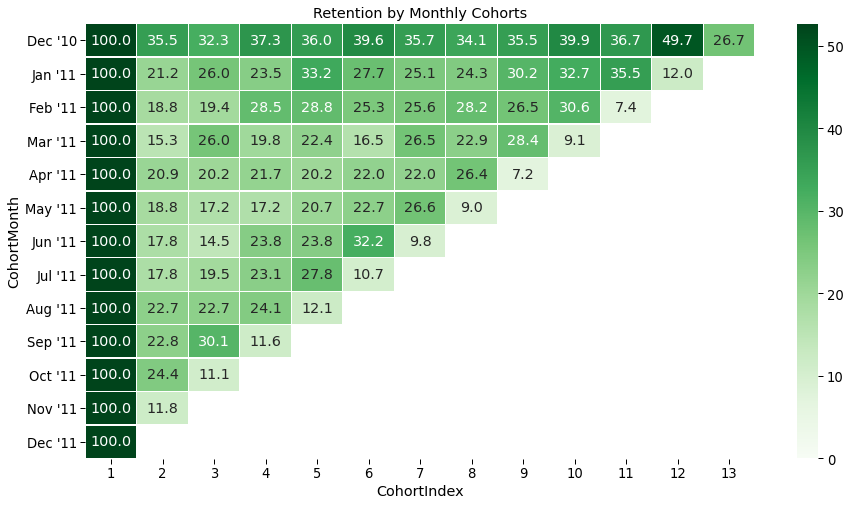

In [35]:
month_list = ["Dec '10", "Jan '11", "Feb '11", "Mar '11", "Apr '11",\
              "May '11", "Jun '11", "Jul '11", "Aug '11", "Sep '11", \
              "Oct '11", "Nov '11", "Dec '11"]

plt.figure(figsize=(15,8))
plt.title('Retention by Monthly Cohorts')
sns.heatmap(data=retention,
            annot = True,
            cmap = "Greens",
            vmin = 0.0,
            vmax = list(retention.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)

plt.show()

# RFM analysis

which customers are the best ones by examining how recently a customer has purchased (recency), how often they purchase (frequency), and how much the customer spends (monetary)

In [36]:
#12 months of data
print('Min:{}; Max:{}'.format(min(retail.InvoiceDate), max(retail.InvoiceDate)))

Min:2010-12-01 08:26:00; Max:2011-12-09 12:49:00


In [37]:
#calculate revenue per row and add new column
retail['MonetaryValue'] = retail['Quantity'] * retail['UnitPrice']

In [38]:
#let's look at amount spend per customer (revenue contributed) M-Monetary
retail_mv = retail.groupby(['CustomerID']).agg({'MonetaryValue': sum}).reset_index()
retail_mv.head()

,CustomerID,MonetaryValue
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33053.19
3,12749.0,4090.88
4,12820.0,942.34


In [39]:
#F-frequency (how many purchases each customer made)
retail_f = retail.groupby('CustomerID')['InvoiceNo'].count()
retail_f = retail_f.reset_index()
retail_f.head()

,CustomerID,InvoiceNo
0,12346.0,1
1,12747.0,103
2,12748.0,4412
3,12749.0,199
4,12820.0,59


In [40]:
#merge previous dataframes together (mv+f)
retail_mv_f = pd.merge(retail_mv, retail_f, on='CustomerID', how='inner')
retail_mv_f.head()

,CustomerID,MonetaryValue,InvoiceNo
0,12346.0,77183.60,1
1,12747.0,4196.01,103
2,12748.0,33053.19,4412
3,12749.0,4090.88,199
4,12820.0,942.34,59


In [41]:
#R-recency 
#last transaction date 

retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],format='%d-%m-%Y %H:%M')
max_date = max(retail['InvoiceDate'])

#difference between last date and transaction date
retail['Diff'] = max_date - retail['InvoiceDate']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,CohortMonth,CohortIndex,MonetaryValue,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01,1,15.30,373 days 04:23:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1,20.34,373 days 04:23:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01,1,22.00,373 days 04:23:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1,20.34,373 days 04:23:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1,20.34,373 days 04:23:00


In [42]:
#recency per customer (last transaction date)
retail_r = retail.groupby('CustomerID')['Diff'].min()
retail_r = retail_r.reset_index()

# Extract number of days only
retail_r['Diff'] = retail_r['Diff'].dt.days

In [43]:
#merge R dataframe with FM

retail_rfm = pd.merge(retail_mv_f, retail_r, on='CustomerID', how='inner')
retail_rfm.columns = ['CustomerID', 'MonetaryValue', 'Frequency', 'Recency']
retail_rfm.head()

,CustomerID,MonetaryValue,Frequency,Recency
0,12346.0,77183.60,1,325
1,12747.0,4196.01,103,1
2,12748.0,33053.19,4412,0
3,12749.0,4090.88,199,3
4,12820.0,942.34,59,2


In [44]:
cols = retail_rfm.columns.tolist()
cols

['CustomerID', 'MonetaryValue', 'Frequency', 'Recency']

In [45]:
#changed columns order
cols = ['CustomerID', 'Recency', 'Frequency', 'MonetaryValue']
retail_rfm = retail_rfm[cols]
retail_rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,325,1,77183.60
1,12747.0,1,103,4196.01
2,12748.0,0,4412,33053.19
3,12749.0,3,199,4090.88
4,12820.0,2,59,942.34


In [46]:
# create labels and assign them to tree percentile groups 
r_labels = range(4, 0, -1)
r_groups = pd.qcut(retail_rfm.Recency, q = 4, labels = r_labels)
f_labels = range(1, 5)
f_groups = pd.qcut(retail_rfm.Frequency, q = 4, labels = f_labels)
m_labels = range(1, 5)
m_groups = pd.qcut(retail_rfm.MonetaryValue, q = 4, labels = m_labels)

In [63]:
# make a new column for group labels
retail_rfm['R'] = r_groups.values
retail_rfm['F'] = f_groups.values
retail_rfm['M'] = m_groups.values
# sum up the three columns
retail_rfm['RFM_Segment'] = retail_rfm.apply(lambda x: str(x['R']) + str(x['F']) + str(x['M']), axis = 1)
retail_rfm['RFM_Score'] = retail_rfm[['R', 'F', 'M']].sum(axis = 1)
retail_rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,RFM_Level,Segment
0,12346.0,325,1,77183.60,1,1,4,114,6,Bronze,others
1,12747.0,1,103,4196.01,4,4,4,444,12,Gold,others
2,12748.0,0,4412,33053.19,4,4,4,444,12,Gold,others
3,12749.0,3,199,4090.88,4,4,4,444,12,Gold,others
4,12820.0,2,59,942.34,4,3,3,433,10,Silver,others


In [78]:
df = pd.DataFrame(retail_rfm,
columns = ['CustomerID', 'Recency',
'Frequency', 'MonetaryValue'])

In [79]:
rfm = df.rename(columns = {'MonetaryValue': 'Amount'}, inplace = False)

In [64]:
# assign labels from total score
score_labels = ['Green', 'Bronze', 'Silver', 'Gold']
score_groups = pd.qcut(retail_rfm.RFM_Score, q = 4, labels = score_labels)
retail_rfm['RFM_Level'] = score_groups.values
retail_rfm.sort_values(by='RFM_Score', ascending=False)
retail_rfm.head(10)

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,RFM_Level,Segment
0,12346.0,325,1,77183.60,1,1,4,114,6,Bronze,others
1,12747.0,1,103,4196.01,4,4,4,444,12,Gold,others
2,12748.0,0,4412,33053.19,4,4,4,444,12,Gold,others
3,12749.0,3,199,4090.88,4,4,4,444,12,Gold,others
4,12820.0,2,59,942.34,4,3,3,433,10,Silver,others
5,12821.0,213,6,92.72,1,1,1,111,3,Green,others
6,12822.0,70,46,948.88,2,3,3,233,8,Silver,others
7,12823.0,74,5,1759.50,2,1,4,214,7,Bronze,others
8,12824.0,59,25,397.12,2,2,2,222,6,Bronze,others
9,12826.0,2,91,1474.72,4,3,3,433,10,Silver,others


In [65]:
retail_rfm_levels = retail_rfm.groupby('RFM_Level')['CustomerID'].count().reset_index(name='counts')
retail_rfm_levels.head()

,RFM_Level,counts
0,Green,1169
1,Bronze,817
2,Silver,1176
3,Gold,758


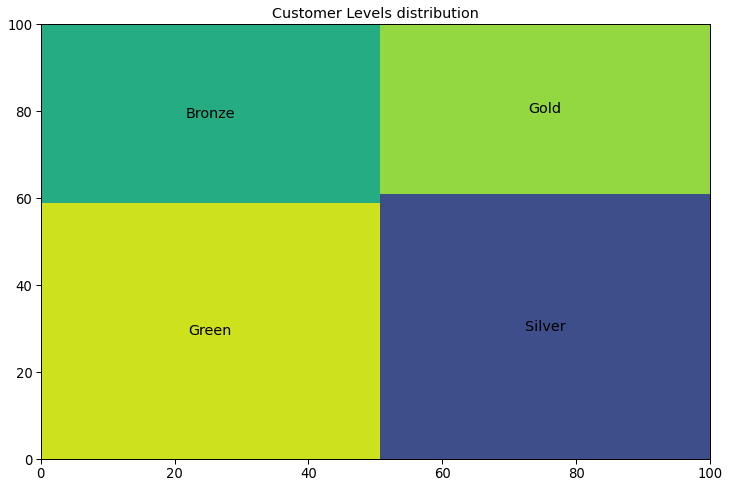

In [66]:
#let's exclude others segment for visualization
levels = list(retail_rfm_levels.RFM_Level)
score = list(retail_rfm_levels.counts)
plt.figure(figsize=(12,8))
plt.title('Customer Levels distribution')
squarify.plot(sizes=score, label=levels)

plt.show()

In [67]:
#let's try to do more detailed segmentation
segment_dict = {    
    'Best Customers':'444',      # Highest frequency as well as monetary value with least recency
    'Loyal Customers':'344',     # High frequency as well as monetary value with good recency
    'Potential Loyalists':'434', # High recency and monetary value, average frequency
    'Big Spenders':'334',        # High monetary value but good recency and frequency values
    'At Risk Customers':'244',   # Customer's shopping less often now who used to shop a lot
    'Can’t Lose Them':'144',      # Customer's shopped long ago who used to shop a lot.
    'Recent Customers':'443',    # Customer's who recently started shopping a lot but with less monetary value
    'Lost Cheap Customers':'122' # Customer's shopped long ago but with less frequency and monetary value
}

In [68]:
segment_dict

{'Best Customers': '444',
 'Loyal Customers': '344',
 'Potential Loyalists': '434',
 'Big Spenders': '334',
 'At Risk Customers': '244',
 'Can’t Lose Them': '144',
 'Recent Customers': '443',
 'Lost Cheap Customers': '122'}

In [69]:
dict_segment = dict(zip(segment_dict.values(),segment_dict.keys()))

In [70]:
dict_segment.get('444')

'Best Customers'

In [71]:
# Swap the key and value of dictionary
dict_segment = dict(zip(segment_dict.values(),segment_dict.keys()))

# Allocate segments to each customer as per the RFM score mapping
retail_rfm['Segment'] = retail_rfm.RFM_Segment.map(lambda x: dict_segment.get(x))

In [72]:
# Allocate all remaining customers to others segment category
retail_rfm.Segment.fillna('others', inplace=True)

In [73]:
retail_rfm.sample(10)

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,RFM_Level,Segment
1355,14730.0,0,462,1897.57,4,4,4,444,12,Gold,Best Customers
197,13095.0,70,6,74.40,2,1,1,211,4,Green,others
186,13080.0,178,6,58.08,1,1,1,111,3,Green,others
1363,14740.0,196,89,1448.21,1,3,3,133,7,Bronze,others
1147,14448.0,8,20,375.35,4,2,2,422,8,Silver,others
2658,16528.0,3,17,244.41,4,1,1,411,6,Bronze,others
3258,17373.0,39,57,646.92,3,3,3,333,9,Silver,others
1944,15549.0,76,114,1681.46,2,4,4,244,10,Silver,At Risk Customers
2681,16563.0,53,19,1077.74,2,2,3,223,7,Bronze,others
1975,15592.0,46,24,388.58,3,2,2,322,7,Bronze,others


In [74]:
retail_rfm_segments = retail_rfm[retail_rfm.Segment!='other'].groupby('Segment')['CustomerID'].count().reset_index(name='counts')
retail_rfm_segments

,Segment,counts
0,At Risk Customers,93
1,Best Customers,414
2,Big Spenders,53
3,Can’t Lose Them,20
4,Lost Cheap Customers,177
5,Loyal Customers,178
6,Potential Loyalists,83
7,Recent Customers,83
8,others,2819


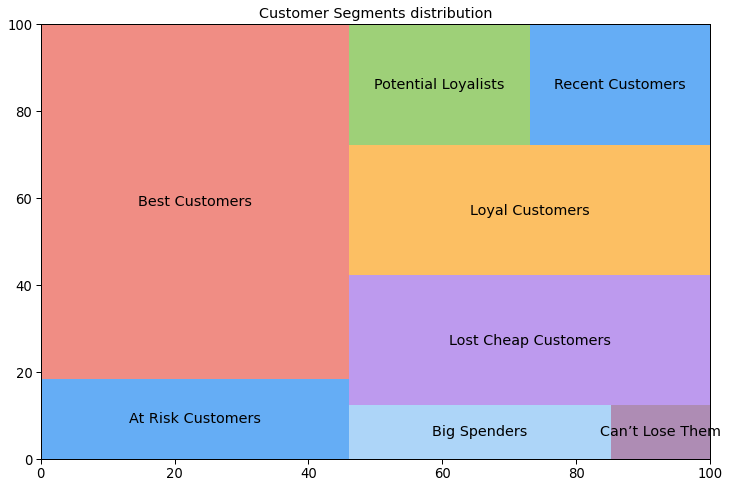

In [75]:
#let's exclude others segment for visualization
segment = list(retail_rfm_segments.iloc[:8].Segment)
score = list(retail_rfm_segments.iloc[:8].counts)
color_list = ["#248af1", "#eb5d50", "#8bc4f6", "#8c5c94", "#a170e8", "#fba521", "#75bc3f"]
plt.figure(figsize=(12,8))
plt.title('Customer Segments distribution')
squarify.plot(sizes=score, label=segment,color=color_list, alpha=0.7)

plt.show()

# Inference
This graph  clearly explains the ratios  of customers with the help of clusters, and gives the way for marketing team to focus on particular group of customers.

 


# Suggested marketing strategies on segmented customers:
* Best Customers- No price incentives, new products, and loyalty programs.

* Big Spenders- Market your most expensive products.

* Almost Lost- Aggresive price incentives

* Lost Customers-Don’t spend too much trying to re-acquire them.

In [80]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

# Rescaling the Attributes
It is extremely important to rescale the variables so that they have a comparable scale.| There are two common ways of rescaling:

Min-Max scaling
Standardisation (mean-0, sigma-1)
Here, we will use Standardisation Scaling.

In [81]:
# Rescaling the attributes

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(3848, 3)

In [82]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,1.750573,0.279916,-0.919086
1,1.688274,1.254203,-0.899021
2,-0.177542,-0.166633,-0.909054
3,-0.681025,-0.704521,1.207790
4,-0.173667,-0.298568,-0.226848


# K-means
K-Means Clustering
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

The algorithm works as follows:

First we initialize k points, called means, randomly.
We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.
We repeat the process for a given number of iterations and at the end, we have our clusters.

In [83]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [84]:
kmeans.labels_

array([1, 1, 2, ..., 2, 3, 2])

## Finding the Optimal Number of Clusters
Elbow Curve to get the right number of Clusters
A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

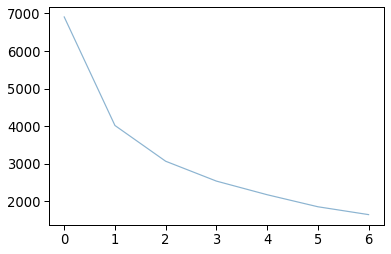

In [85]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

## Silhouette Analysis

silhouette score=(p−q)/max(p,q)

p  is the mean distance to the points in the nearest cluster that the data point is not a part of

q  is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [87]:
# Silhouette analysis
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5410523701759601
For n_clusters=3, the silhouette score is 0.5074700018203454
For n_clusters=4, the silhouette score is 0.47731956502787737
For n_clusters=5, the silhouette score is 0.4703918801356097
For n_clusters=6, the silhouette score is 0.41807435236200263
For n_clusters=7, the silhouette score is 0.41856135612583734
For n_clusters=8, the silhouette score is 0.41017903593677607


In [88]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [89]:
kmeans.labels_

array([2, 2, 0, ..., 0, 2, 0])

In [90]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,Recency,Frequency,Amount,Cluster_Id
1,12747.0,1,103,4196.01,2
3,12749.0,3,199,4090.88,2
4,12820.0,2,59,942.34,0
5,12821.0,213,6,92.72,1
6,12822.0,70,46,948.88,0


<AxesSubplot:xlabel='Cluster_Id', ylabel='Amount'>

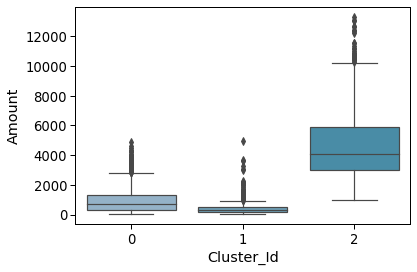

In [91]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Frequency'>

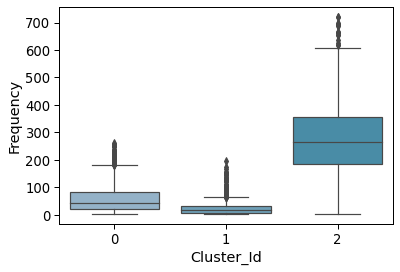

In [92]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Recency'>

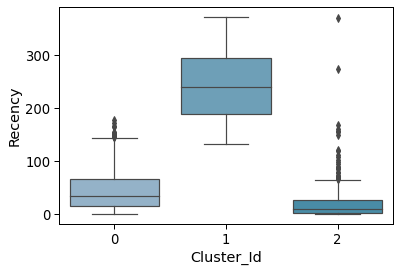

In [93]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

# Inference:
K-Means Clustering with 3 Cluster Ids

Customers with Cluster Id 1 are the customers with high amount of transactions as compared to other customers.
Customers with Cluster Id 1 are frequent buyers.
Customers with Cluster Id 2 are not recent buyers and hence least of importance from business point of view.